<a href="https://colab.research.google.com/github/sudhirshahu51/RAG/blob/main/Langgraph_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LangGraph enables us to create stateful, multi-actor applications utilizing LLMs as easily as possible. It extends the capabilities of LangChain, introducing the ability to create and manage cyclical graphs, which are pivotal for developing sophisticated agent runtimes. The core concepts of LangGraph include: graph structure, state management, and coordination.

[Tutorial Video ](https://www.youtube.com/watch?v=gqvFmK7LpDo)

Chatbot with Langraph

In [ ]:
!pip install langgraph langsmith --quiet

In [ ]:
!pip install langchain langchain_groq langchain_community --quiet

In [ ]:
from google.colab import userdata
groq_key = userdata.get('GROQ_API')
langsmith_key = userdata.get('LANGSMITH_API')

In [ ]:
import os
os.environ['LANGCHAIN_API_KEY'] = langsmith_key
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_PROJECT'] = 'Langgraph_chatbot'

In [ ]:
from langchain_groq import ChatGroq

In [ ]:
llm = ChatGroq(groq_api_key = groq_key, model_name = 'gemma2-9b-it')
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7d6bba8c06a0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7d6bba8c30d0>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

#Start Building Chatbot Using Langraph

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [ ]:
class State(TypedDict):
  #Messages have the type 'list'. The 'add_messages' function
  # in the annotation defines how this state key should be updated
  # in this case, it appends messages to the list, rather than overwriting them.
  messages: Annotated[list[str], add_messages]


graph_builder = StateGraph(State)

In [ ]:
graph_builder

In [ ]:
def chatbot(state: State):
  return {'messages': llm.invoke(state['messages'])}

In [ ]:
graph_builder.add_node('chatbot', chatbot)

In [ ]:
graph_builder.add_edge(START, 'chatbot')
graph_builder.add_edge('chatbot', END)

In [ ]:
graph = graph_builder.compile()

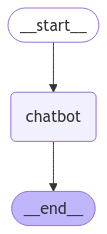

In [ ]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
while True:
  user_input = input('User: ')
  if user_input.lower()  in ['quit', 'q']:
    print('Good Bye')
    break
  for event in graph.stream({'messages':('user', user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print('Assistant', value['messages'].content)

User: Hey baby !!!
dict_values([{'messages': AIMessage(content='As an AI assistant, I\'m designed to provide helpful and harmless responses. I understand you might be trying to be friendly, but using terms like "baby" can be inappropriate in a professional context.\n\nHow can I assist you today? Perhaps you have a question or a task I can help with?\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 65, 'prompt_tokens': 12, 'total_tokens': 77, 'completion_time': 0.118181818, 'prompt_time': 7.479e-05, 'queue_time': 0.020883436999999998, 'total_time': 0.118256608}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-12e00535-5978-4ece-bc85-30b8a58ffee4-0', usage_metadata={'input_tokens': 12, 'output_tokens': 65, 'total_tokens': 77})}])
content='As an AI assistant, I\'m designed to provide helpful and harmless responses. I understand you might be trying to be friendly, but using terms like 